In [2]:
import numpy as np, pandas as pd

# DataFrame and Series

In [5]:
menu = pd.Series(data=[10, 15, 20, 30])
quantity = pd.Series(data=[5, 3, 8, 4])

menu
quantity

0    5
1    3
2    8
3    4
dtype: int64

In [8]:
df = pd.DataFrame(data={'menu': menu, 'quantity': quantity})

## column extract

In [10]:
df['menu']

0    10
1    15
2    20
3    30
Name: menu, dtype: int64

In [13]:
df.menu

0    10
1    15
2    20
3    30
Name: menu, dtype: int64

In [12]:
df[['menu']]

menu
0    10
1    15
2    20
3    30

대괄호 1개 사용 또는 .으로 추출시 시리즈, 2개 사용시 데이터프레임. 

# File I/O

## Data import

In [ ]:
#df = pd.read_csv()/pd.read_excel()
#df.to_csv(dataname, header = (bull), index = (bull))
#df.to_excel()

In [23]:
df = pd.read_csv('Data/AAPL.csv', usecols=['ticker', 'date', 'open', 'high'], parse_dates=['date'], index_col='date')

In [24]:
df

ticker     open    high
date                              
1980-12-12   AAPL    0.130    0.13
1980-12-15   AAPL    0.120    0.12
1980-12-16   AAPL    0.110    0.11
1980-12-17   AAPL    0.120    0.12
1980-12-18   AAPL    0.120    0.12
...           ...      ...     ...
2024-12-03   AAPL  239.810  242.76
2024-12-04   AAPL  242.870  244.11
2024-12-05   AAPL  243.990  244.54
2024-12-06   AAPL  242.905  244.63
2024-12-09   AAPL  241.830  247.24

[11091 rows x 3 columns]

## Data export

In [16]:
df.to_csv('temp_saving.csv', header = True, index = False)

# EDA

원래 EDA 시에는 데이터 시각화를 적극 사용한다. 하지만, 여기서는 pandas만으로 가능한 EDA를 싣는다.

# Data Wrangling

## Change Data Types

In [ ]:
# df['col'].astype('category')
# df['col'].astype(int)
# df['col'].astype(float)

In [25]:
df = pd.read_csv('Data/AAPL.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11091 entries, 0 to 11090
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  11091 non-null  object 
 1   date    11091 non-null  object 
 2   open    11091 non-null  float64
 3   high    11091 non-null  float64
 4   low     11091 non-null  float64
 5   close   11091 non-null  float64
dtypes: float64(4), object(2)
memory usage: 520.0+ KB


In [28]:
df[['date']].astype('datetime64[ns]')

date
0     1980-12-12
1     1980-12-15
2     1980-12-16
3     1980-12-17
4     1980-12-18
...          ...
11086 2024-12-03
11087 2024-12-04
11088 2024-12-05
11089 2024-12-06
11090 2024-12-09

[11091 rows x 1 columns]

## Rows Processing

## Columns Processing

#### .loc(), .iloc()

이때, .loc()를 활용해 칼럼의 값 변경도 가능하다.

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [9]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

### object describe

In [14]:
df.describe(include = 'all')

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

### select columns

In [27]:
#(1 column)
df['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [28]:
df.iloc[:, 0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [31]:
#(2 columns)
df[['sepal length (cm)', 'sepal width (cm)']]

sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]

In [35]:
#df.iloc[:, ['sepal length (cm)', 'sepal width (cm)']] : 사용불가
df.iloc[:, [0, 1]]

sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]

### filter some rows : by condition

1개 조건

In [19]:
cond = df['sepal length (cm)'] > 5
df[cond]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
5                  5.4               3.9                1.7               0.4
10                 5.4               3.7                1.5               0.2
14                 5.8               4.0                1.2               0.2
15                 5.7               4.4                1.5               0.4
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[118 rows x 4 columns]

In [ ]:
df[~cond]

2개 이상의 조건

In [20]:
condition = df['sepal width (cm)'] > 3
df[condition&cond]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
5                  5.4               3.9                1.7               0.4
10                 5.4               3.7                1.5               0.2
14                 5.8               4.0                1.2               0.2
15                 5.7               4.4                1.5               0.4
16                 5.4               3.9                1.3               0.4
17                 5.1               3.5                1.4               0.3
18                 5.7               3.8                1.7               0.3
19                 5.1               3.8                1.5               0.3
20                 5.4               3.4                1.7               0.2
21                 5.1               3.7                1.5               0.4
23                 5.1               3.3                1.7               0.5
27                 5.2               3.5                1.5               0.2
28                 5.2               3.4                1.4               0.2
31                 5.4               3.4                1.5               0.4
32                 5.2               4.1                1.5               0.1
33                 5.5               4.2                1.4               0.2
36                 5.5               3.5                1.3               0.2
39                 5.1               3.4                1.5               0.2
44                 5.1               3.8                1.9               0.4
46                 5.1               3.8                1.6               0.2
48                 5.3               3.7                1.5               0.2
50                 7.0               3.2                4.7               1.4
51                 6.4               3.2                4.5               1.5
52                 6.9               3.1                4.9               1.5
56                 6.3               3.3                4.7               1.6
65                 6.7               3.1                4.4               1.4
70                 5.9               3.2                4.8               1.8
85                 6.0               3.4                4.5               1.6
86                 6.7               3.1                4.7               1.5
100                6.3               3.3                6.0               2.5
109                7.2               3.6                6.1               2.5
110                6.5               3.2                5.1               2.0
115                6.4               3.2                5.3               2.3
117                7.7               3.8                6.7               2.2
120                6.9               3.2                5.7               2.3
124                6.7               3.3                5.7               2.1
125                7.2               3.2                6.0               1.8
131                7.9               3.8                6.4               2.0
136                6.3               3.4                5.6               2.4
137                6.4               3.1                5.5               1.8
139                6.9               3.1                5.4               2.1
140                6.7               3.1                5.6               2.4
141                6.9               3.1                5.1               2.3
143                6.8               3.2                5.9               2.3
144                6.7               3.3                5.7               2.5
148                6.2               3.4                5.4               2.3

(`.isin()` 활용)

In [21]:
condition = df['sepal width (cm)'].isin([3.0, 3.5])
df[condition]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
12                 4.8               3.0                1.4               0.1
13                 4.3               3.0                1.1               0.1
17                 5.1               3.5                1.4               0.3
25                 5.0               3.0                1.6               0.2
27                 5.2               3.5                1.5               0.2
36                 5.5               3.5                1.3               0.2
38                 4.4               3.0                1.3               0.2
40                 5.0               3.5                1.3               0.3
43                 5.0               3.5                1.6               0.6
45                 4.8               3.0                1.4               0.3
61                 5.9               3.0                4.2               1.5
66                 5.6               3.0                4.5               1.5
75                 6.6               3.0                4.4               1.4
77                 6.7               3.0                5.0               1.7
84                 5.4               3.0                4.5               1.5
88                 5.6               3.0                4.1               1.3
91                 6.1               3.0                4.6               1.4
95                 5.7               3.0                4.2               1.2
102                7.1               3.0                5.9               2.1
104                6.5               3.0                5.8               2.2
105                7.6               3.0                6.6               2.1
112                6.8               3.0                5.5               2.1
116                6.5               3.0                5.5               1.8
127                6.1               3.0                4.9               1.8
129                7.2               3.0                5.8               1.6
135                7.7               3.0                6.1               2.3
138                6.0               3.0                4.8               1.8
145                6.7               3.0                5.2               2.3
147                6.5               3.0                5.2               2.0
149                5.9               3.0                5.1               1.8

한 칼럼의 후보가 여러 개인 경우 검색가능. 단, 완전한 일치만 찾을 수 있음. 

In [50]:
df[df[['sepal length (cm)', 'sepal length (cm)']] == [5.1, 4.1]]

ValueError: cannot reindex on an axis with duplicate labels

In [41]:
df.iloc[0:50, :]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2
12                4.8               3.0                1.4               0.1
13                4.3               3.0                1.1               0.1
14                5.8               4.0                1.2               0.2
15                5.7               4.4                1.5               0.4
16                5.4               3.9                1.3               0.4
17                5.1               3.5                1.4               0.3
18                5.7               3.8                1.7               0.3
19                5.1               3.8                1.5               0.3
20                5.4               3.4                1.7               0.2
21                5.1               3.7                1.5               0.4
22                4.6               3.6                1.0               0.2
23                5.1               3.3                1.7               0.5
24                4.8               3.4                1.9               0.2
25                5.0               3.0                1.6               0.2
26                5.0               3.4                1.6               0.4
27                5.2               3.5                1.5               0.2
28                5.2               3.4                1.4               0.2
29                4.7               3.2                1.6               0.2
30                4.8               3.1                1.6               0.2
31                5.4               3.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
34                4.9               3.1                1.5               0.2
35                5.0               3.2                1.2               0.2
36                5.5               3.5                1.3               0.2
37                4.9               3.6                1.4               0.1
38                4.4               3.0                1.3               0.2
39                5.1               3.4                1.5               0.2
40                5.0               3.5                1.3               0.3
41                4.5               2.3                1.3               0.3
42                4.4               3.2                1.3               0.2
43                5.0               3.5                1.6               0.6
44                5.1               3.8                1.9               0.4
45                4.8               3.0                1.4               0.3
46                5.1               3.8                1.6               0.2
47                4.6               3.2                1.4               0.2
48                5.3               3.7                1.5               0.2
49                5.0               3.3                1.4               0.2

SyntaxError: invalid syntax (3038495615.py, line 1)

In [45]:
df.iloc[[0, 2], :].copy() #make copy

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
2                4.7               3.2                1.3               0.2

In [72]:
#np.array -> 배열에서 추출

### replace values

In [22]:
change_dict = {0:5.1, 1:3.5, 2:1.4, 3:0.2}
df.replace(change_dict)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               0.2                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               0.2                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               0.2                5.2               1.4
148                6.2               3.4                5.4               2.3
149                5.9               0.2                5.1               1.8

[150 rows x 4 columns]

### mutating -> make new columns

In [52]:
df['len'] = df['petal length (cm)'].apply(round)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     len  
0      1  
1      1  
2      1  
3      2  
4      1  
..   ...  
145    5  
146    5  
147    5  
148    5  
149    5  

[150 rows x 5 columns]

### arrange rows 

Use `.sort_index()` or `.sort_values()`

In [15]:
df.sort_index()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

`.sort_index()`를 통해 index의 순서대로 값을 정렬한다.

In [17]:
df.sort_values(by='sepal length (cm)')

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
13                 4.3               3.0                1.1               0.1
42                 4.4               3.2                1.3               0.2
38                 4.4               3.0                1.3               0.2
8                  4.4               2.9                1.4               0.2
41                 4.5               2.3                1.3               0.3
..                 ...               ...                ...               ...
122                7.7               2.8                6.7               2.0
118                7.7               2.6                6.9               2.3
117                7.7               3.8                6.7               2.2
135                7.7               3.0                6.1               2.3
131                7.9               3.8                6.4               2.0

[150 rows x 4 columns]

`.sort_values(by = colname)`를 통해 column의 value 순서대로 값을 정렬한다. 기본값은 ascending = True이다.

In [18]:
df.sort_values(by=['sepal length (cm)', 'petal length (cm)'], ascending=[False, True])

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
131                7.9               3.8                6.4               2.0
135                7.7               3.0                6.1               2.3
117                7.7               3.8                6.7               2.2
122                7.7               2.8                6.7               2.0
118                7.7               2.6                6.9               2.3
..                 ...               ...                ...               ...
41                 4.5               2.3                1.3               0.3
38                 4.4               3.0                1.3               0.2
42                 4.4               3.2                1.3               0.2
8                  4.4               2.9                1.4               0.2
13                 4.3               3.0                1.1               0.1

[150 rows x 4 columns]

두 개 이상의 컬럼을 리스트 형태로 묶어 한 번에 정렬하는 것도 가능하다.

cf) 만약 index를 정렬된 순서대로 재지정하고 싶다면, `.reset_index()`를 사용한다.

### One-Hot Encoding

In [55]:
df2 = pd.DataFrame({'k' : ['a', 'b', 'c', 'd', 'e']})
pd.get_dummies(df2['k'], drop_first = True)

b      c      d      e
0  False  False  False  False
1   True  False  False  False
2  False   True  False  False
3  False  False   True  False
4  False  False  False   True

### groupby

In [76]:
df['target'] = iris.target
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     len  target  
0      1       0  
1      1       0  
2      1       0  
3      2       0  
4      1       0  
..   ...     ...  
145    5       2  
146    5       2  
147    5       2  
148    5       2  
149    5       2  

[150 rows x 6 columns]

In [78]:
df.groupby('target').mean()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal width (cm)   len  
target                          
0                  0.246  1.52  
1                  1.326  4.22  
2                  2.026  5.62

In [77]:
df.groupby(['target', 'len']).mean()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target len                                                           
0      1             4.895833          3.333333           1.325000   
       2             5.107692          3.515385           1.588462   
1      3             5.000000          2.400000           3.200000   
       4             5.812121          2.727273           4.139394   
       5             6.428571          2.950000           4.771429   
2      4             4.900000          2.500000           4.500000   
       5             6.204762          2.866667           5.085714   
       6             6.812500          3.075000           5.808333   
       7             7.675000          3.050000           6.725000   

            petal width (cm)  
target len                    
0      1            0.216667  
       2            0.273077  
1      3            1.033333  
       4            1.284848  
       5            1.485714  
2      4            1.700000  
       5            1.966667  
       6            2.070833  
       7            2.150000

summarise()는 python의 함수로 사용!

### data join by merge

In [ ]:
dfc = pd.merge(dfa, dfb, 'inner', 'k')
dfc

k  a  b  c  d
0  10  1  3  5  7
1  11  2  4  6  8

### data paste by concat

In [66]:
dfa = pd.DataFrame({'k':[10, 11],'a':[1,2], 'b':[3,4]})
dfb = pd.DataFrame({'k':[10, 11], 'c':[5,6], 'd':[7,8]})

In [67]:
dfc = pd.concat([dfa, dfb])#행결합 
dfc

k    a    b    c    d
0  10  1.0  3.0  NaN  NaN
1  11  2.0  4.0  NaN  NaN
0  10  NaN  NaN  5.0  7.0
1  11  NaN  NaN  6.0  8.0

In [68]:
dfd = pd.concat([dfa, dfb], axis=1)#열결합 
dfd

k  a  b   k  c  d
0  10  1  3  10  5  7
1  11  2  4  11  6  8

## Missing Values

### Check Missing Values

In [2]:
airQ = pd.read_csv('airquality.csv')
print(airQ)

In [11]:
airQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [10]:
airQ

     Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[153 rows x 6 columns]


Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[153 rows x 6 columns]

In [5]:
airQ.isna()
#returns a Boolean matrix

Ozone  Solar.R   Wind   Temp  Month    Day
0    False    False  False  False  False  False
1    False    False  False  False  False  False
2    False    False  False  False  False  False
3    False    False  False  False  False  False
4     True     True  False  False  False  False
..     ...      ...    ...    ...    ...    ...
148  False    False  False  False  False  False
149   True    False  False  False  False  False
150  False    False  False  False  False  False
151  False    False  False  False  False  False
152  False    False  False  False  False  False

[153 rows x 6 columns]

In [13]:
airQ.isna().sum()# info() methods로도 추출 가능

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [8]:
airQ.isna().sum(axis = 1)

0      0
1      0
2      0
3      0
4      2
      ..
148    0
149    1
150    0
151    0
152    0
Length: 153, dtype: int64

In [12]:
airQ.isna().sum(axis = 1).sum()

44

In [20]:
airQ.shape[0] - airQ.dropna().shape[0]
#the number of all rows - the number of rows without nas

42

### processing missing values

#### erase

In [22]:
airQ.drop(1, axis = 0)

Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
5     28.0      NaN  14.9    66      5    6
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[152 rows x 6 columns]

In [23]:
airQ.drop(columns = 'Ozone')

Solar.R  Wind  Temp  Month  Day
0      190.0   7.4    67      5    1
1      118.0   8.0    72      5    2
2      149.0  12.6    74      5    3
3      313.0  11.5    62      5    4
4        NaN  14.3    56      5    5
..       ...   ...   ...    ...  ...
148    193.0   6.9    70      9   26
149    145.0  13.2    77      9   27
150    191.0  14.3    75      9   28
151    131.0   8.0    76      9   29
152    223.0  11.5    68      9   30

[153 rows x 5 columns]

In [33]:
airQ.drop(labels = [x for x in range(0, len(airQ)) if x%2 == 1])

Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
2     12.0    149.0  12.6    74      5    3
4      NaN      NaN  14.3    56      5    5
6     23.0    299.0   8.6    65      5    7
8      8.0     19.0  20.1    61      5    9
..     ...      ...   ...   ...    ...  ...
144   23.0     14.0   9.2    71      9   22
146    7.0     49.0  10.3    69      9   24
148   30.0    193.0   6.9    70      9   26
150   14.0    191.0  14.3    75      9   28
152   20.0    223.0  11.5    68      9   30

[77 rows x 6 columns]

In [34]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels: 'IndexLabel | None' = None, *, axis: 'Axis' = 0, index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None'
    Drop specified labels from rows or columns.

    Remove rows or columns by specifying label names and corresponding
    axis, or by directly specifying index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.

    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        

In [41]:
print(airQ.dropna(), airQ.dropna(axis = 1))

     Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
6     23.0    299.0   8.6    65      5    7
..     ...      ...   ...   ...    ...  ...
147   14.0     20.0  16.6    63      9   25
148   30.0    193.0   6.9    70      9   26
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[111 rows x 6 columns]      Wind  Temp  Month  Day
0     7.4    67      5    1
1     8.0    72      5    2
2    12.6    74      5    3
3    11.5    62      5    4
4    14.3    56      5    5
..    ...   ...    ...  ...
148   6.9    70      9   26
149  13.2    77      9   27
150  14.3    75      9   28
151   8.0    76      9   29
152  11.5    68      9   30

[153 rows x 4 columns]


In [40]:
print(airQ.dropna(how = 'any'))
print(airQ.dropna(how = 'all'))

     Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
6     23.0    299.0   8.6    65      5    7
..     ...      ...   ...   ...    ...  ...
147   14.0     20.0  16.6    63      9   25
148   30.0    193.0   6.9    70      9   26
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[111 rows x 6 columns]
     Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18

#### simple change

In [43]:
print(airQ.fillna('nyan'))

    Ozone Solar.R  Wind  Temp  Month  Day
0    41.0   190.0   7.4    67      5    1
1    36.0   118.0   8.0    72      5    2
2    12.0   149.0  12.6    74      5    3
3    18.0   313.0  11.5    62      5    4
4    nyan    nyan  14.3    56      5    5
..    ...     ...   ...   ...    ...  ...
148  30.0   193.0   6.9    70      9   26
149  nyan   145.0  13.2    77      9   27
150  14.0   191.0  14.3    75      9   28
151  18.0   131.0   8.0    76      9   29
152  20.0   223.0  11.5    68      9   30

[153 rows x 6 columns]
    Ozone Solar.R  Wind  Temp Month   Day
0    41.0   190.0   7.4  67.0   5.0   1.0
1    36.0   118.0   8.0  72.0   5.0   2.0
2    12.0   149.0  12.6  74.0   5.0   3.0
3    18.0   313.0  11.5  62.0   5.0   4.0
4    nyan    nyan  14.3  56.0   5.0   5.0
..    ...     ...   ...   ...   ...   ...
148  30.0   193.0   6.9  70.0   9.0  26.0
149  nyan   145.0  13.2  77.0   9.0  27.0
150  14.0   191.0  14.3  75.0   9.0  28.0
151  18.0   131.0   8.0  76.0   9.0  29.0
152  20.0 

In [45]:
airQ2 = airQ[:]
airQ2['Ozone'] = airQ['Ozone'].fillna(airQ['Ozone'].mean())
airQ2

Ozone  Solar.R  Wind  Temp  Month  Day
0    41.00000    190.0   7.4    67      5    1
1    36.00000    118.0   8.0    72      5    2
2    12.00000    149.0  12.6    74      5    3
3    18.00000    313.0  11.5    62      5    4
4    42.12931      NaN  14.3    56      5    5
..        ...      ...   ...   ...    ...  ...
148  30.00000    193.0   6.9    70      9   26
149  42.12931    145.0  13.2    77      9   27
150  14.00000    191.0  14.3    75      9   28
151  18.00000    131.0   8.0    76      9   29
152  20.00000    223.0  11.5    68      9   30

[153 rows x 6 columns]

### outliers, leverage points

#### Find Outliers

In [60]:
# ESD : 3sigma 이상이 outlier
def esd(x : list) -> list :
    return (abs(x - x.mean())/x.std()) < 3

moi = [x for x in range(1,20)]
moi.append(300)
moi = pd.DataFrame(moi)
esd(moi)

0
0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
10   True
11   True
12   True
13   True
14   True
15   True
16   True
17   True
18   True
19  False

In [70]:
moi = {i+1:[i, i+2] for i in range(0,5)}
moi = pd.DataFrame(moi)
esd(moi[1])

0    True
1    True
Name: 1, dtype: bool

In [47]:
# geomean : 기하평균에서 2.5sigma 이상이 이상치

In [48]:
# quantile : 1.5IQR 이상이 이상치

In [72]:
df = pd.DataFrame({'Score' : [1,2,3,4,5], 'Value' : [1, 3, 5, 6, 10]})

In [73]:
df

Score  Value
0      1      1
1      2      3
2      3      5
3      4      6
4      5     10

{'whiskers': [<matplotlib.lines.Line2D at 0x1f21d354860>,
 'caps': [<matplotlib.lines.Line2D at 0x1f21d3555e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f21d354ec0>,
 'medians': [<matplotlib.lines.Line2D at 0x1f21d355c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f21d355f10>,
 'means': []}

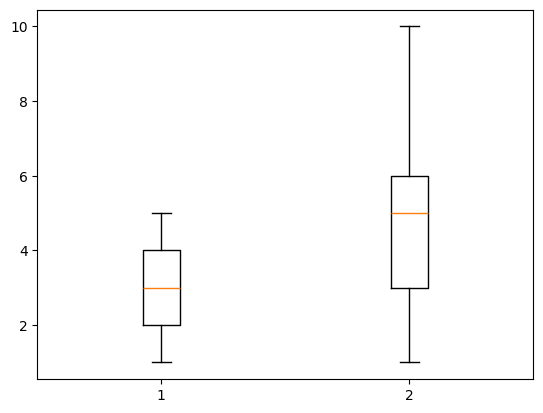

In [74]:
plt.boxplot(df)

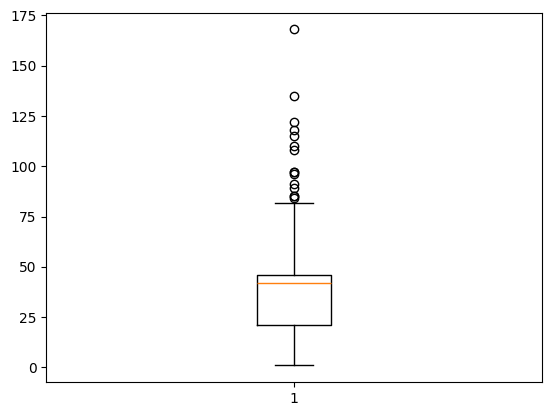

In [79]:
oZoNe = plt.boxplot(airQ2['Ozone'])


In [85]:
minValue = oZoNe['whiskers'][0].get_ydata()[1]
maxValue = oZoNe['whiskers'][1].get_ydata()[1]#수염의 끝부분
print(minValue, maxValue)

1.0 82.0


In [88]:
Q1 = oZoNe['boxes'][0].get_ydata()[1]
Q3 = oZoNe['boxes'][0].get_ydata()[2]
print(Q1, Q3)

21.0 46.0


In [90]:
Q2 = oZoNe['medians'][0].get_ydata()[0]
print(Q2)

42.12931034482759


In [94]:
scipy.stats.iqr(airQ2['Ozone'])

25.0

#### process outliers

In [95]:
# 삭제

In [ ]:
# 대체

In [ ]:
# 변환

In [ ]:
# 분류

### 날짜 데이터 처리

In [1]:
from datetime import datetime

In [4]:
#datetime.strptime(date_string, format)
#time.year/time.month/time.day
#timedata.total_seconds

* %Y/%y(4자리 연도/2자리 연도)
* %m/%B/%b(숫자 월/영문 월/영문 월 축약)
* %d(일)
* %H/%l(24시간제 시/12시간제 시)
* %M(분)
* %S(초)

### 범위 변환

#### Normalization

map from R -> [0,1]

In [118]:
egz = np.array([1,3,5,7,9])

In [119]:
#minmaxscaling

def minmax(lst) :
    l = []
    for x in lst :
        l.append((x - np.min(lst))/(np.max(lst) - np.min(lst)))
    return l

minmax(egz)

[0.0, 0.25, 0.5, 0.75, 1.0]

In [120]:
from sklearn.preprocessing import MinMaxScaler

egz2 = egz.reshape(-1, 1)
print(egz2)
MinMaxScaler().fit_transform(egz2)

[[1]
 [3]
 [5]
 [7]
 [9]]


array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

#### Standardization

normal distribution 가정, transform to mean 0, standard divation 1

In [106]:
#Z-Score
egz = np.array([1,3,5,7,9])

def normalize(xlst) :
    l = []
    for x in xlst :
        l.append((x - np.mean(xlst))/np.std(xlst, ddof = 1))#ddof = 1 if 표본표준편차 계산시
    return l

normalize(egz)

[-1.2649110640673518,
 -0.6324555320336759,
 0.0,
 0.6324555320336759,
 1.2649110640673518]

### 표본추출

In [7]:
nstr = np.arange(1,11)
nstr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
np.random.choice(nstr, size = 5, replace = False)

array([10,  7,  2,  6,  8])

### 통계량 계산

#### 평균

In [17]:
np.mean(nstr)
np.nanmean(nstr)
scipy.stats.trim_mean(nstr, 0.2)

5.5

#### 중위수

In [19]:
np.median(nstr)
np.nanmedian(nstr)

5.5

#### 최빈값

In [20]:
np.bincount(nstr).argmax()

1

#### 분산/표준편차

In [21]:
np.var(nstr, ddof = 0)
np.nanvar(nstr, ddof = 1)
np.std(nstr, ddof = 0)
np.nanstd(nstr, ddof = 1)

3.0276503540974917

#### 범위(range)

In [23]:
np.ptp(nstr)#peak to peak
np.min(nstr)
np.max(nstr)

10

#### IQR, 분위수

In [27]:
np.percentile(nstr, 10)#0~100의 정수가 뒤에 들어감
scipy.stats.iqr(nstr)

4.5

#### 순위

In [29]:
pd.Series(nstr).rank()#methods = 'average', 'first', 'min', 'dense'

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64

#### 반올림

In [30]:
np.round(nstr)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])